In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv("./Fish.csv")
df.head(3)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961


### 잘못된 학습

In [ ]:
length = df[df["Species"].isin(["Bream", "Smelt"])]["Length2"].to_list()
weight = df[df["Species"].isin(["Bream", "Smelt"])]["Weight"].to_list()
fish_data = [[l, w] for l, w in zip(length, weight)]
fish_target = [1] * 35 + [0] * 14

훈련용, 테스트용 데이터

In [ ]:
# fish_data의 요소 배치가 [도미 35개] + [빙어 14개]와 같이 저장되어 있으므로
# 좋은 데이터는 아닌듯
train_input = fish_data[:35]
train_target = fish_target[:35]
train_input_x, train_input_y = zip(*train_input)

test_input = fish_data[35:]
test_target = fish_target[35:]
test_input_x, test_input_y = zip(*test_input)

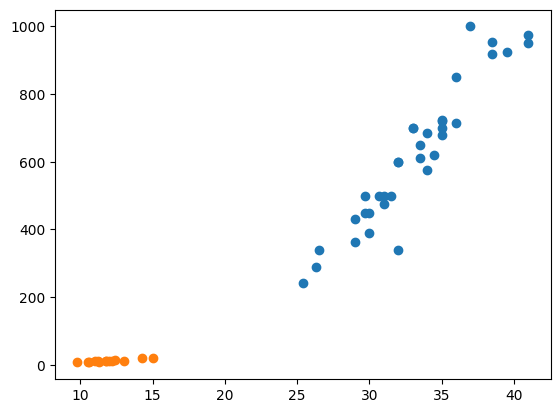

In [ ]:
plt.scatter(train_input_x, train_input_y)
plt.scatter(test_input_x, test_input_y)
plt.show()

학습

In [ ]:
ML = KNeighborsClassifier()
ML.fit(train_input, train_target)

KNeighborsClassifier()

In [ ]:
ML.score(test_input, test_target)

0.0

### 데이터 섞기

In [ ]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [ ]:
np.random.seed(42)

index = np.arange(input_arr.shape[0])
np.random.shuffle(index)
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]
print(test_input)
print(test_target)

[[ 10.6   7. ]
 [  9.8   6.7]
 [ 35.  680. ]
 [ 11.2   9.8]
 [ 31.  475. ]
 [ 34.5 620. ]
 [ 33.5 610. ]
 [ 15.   19.9]
 [ 34.  575. ]
 [ 30.  390. ]
 [ 11.8   9.9]
 [ 32.  600. ]
 [ 36.  850. ]
 [ 11.    9.7]]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


섞은 데이터 산점도

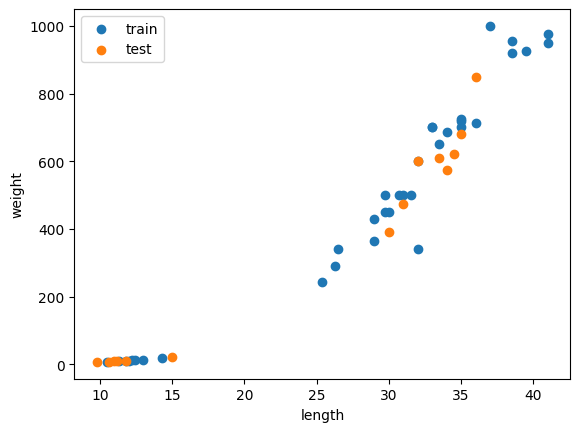

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1], label = "train")
plt.scatter(test_input[:, 0], test_input[:, 1], label = "test")
plt.legend()
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

학습

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(train_input, train_target)

KNeighborsClassifier()

In [ ]:
KNN.score(test_input, test_target)
# 100점

1.0

In [ ]:
TEST = [[30, 600], [13, 100], [9.7, 8.9]]
for t in TEST:
  print("도미") if KNN.predict([t])[0] else print("빙어")

도미
빙어
빙어


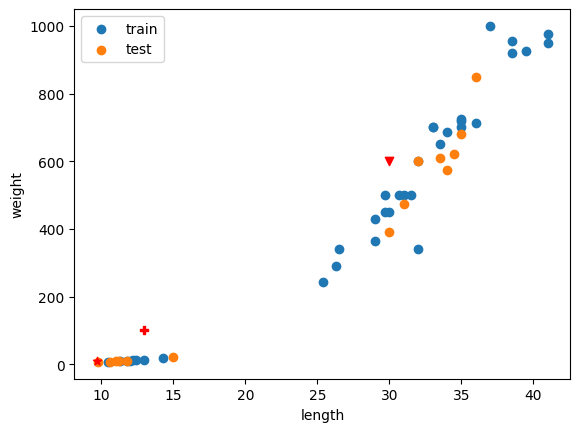

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1], label = "train")
plt.scatter(test_input[:, 0], test_input[:, 1], label = "test")
for t in zip(TEST, ["v", "P", "*"]):
  plt.scatter(*t[0], color = "r", marker = t[1])
plt.legend()
plt.xlabel("length")
plt.ylabel("weight")
plt.show()